# Basic Testing

In this notebook we test that the main files work well.



# 1. Setup

In [1]:
# import numpy as np
# from agents import Agent
# from model import Model
# from tqdm import tqdm
# import networkx as nx
# import pandas as pd
# import random
# import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2   
from imports import *              
from agents import Agent
from model import Model


ModuleNotFoundError: No module named 'seaborn'

# 2. First Test


## Bayes

  0%|          | 35/10000 [00:00<00:19, 509.46it/s]

steps:  36
This is the history of mean credences of the agents, with agent type bayes


<Axes: title={'center': 'Mean Credences'}>

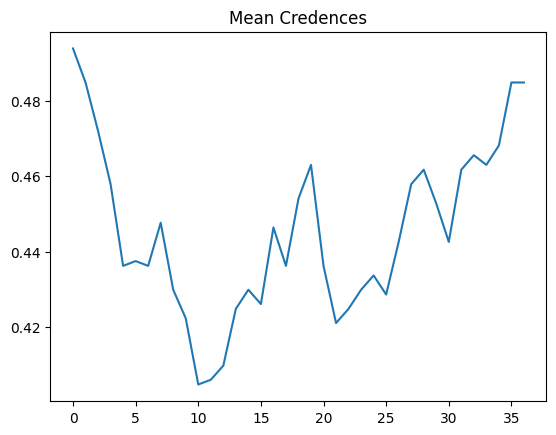

In [ ]:
n_agents = 100
agent_type = "bayes"
my_network = nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)
my_model = Model(my_network, n_experiments=10, uncertainty=0.001,agent_type = agent_type)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount
print('steps: ',my_model.n_steps)
df = pd.DataFrame(my_model.agent_histories)
mean_credences = df.mean()
print(f'This is the history of mean credences of the agents, with agent type {agent_type}')
mean_credences.plot(title='Mean Credences')

This is the history of credences for each agent, with agent type bayes


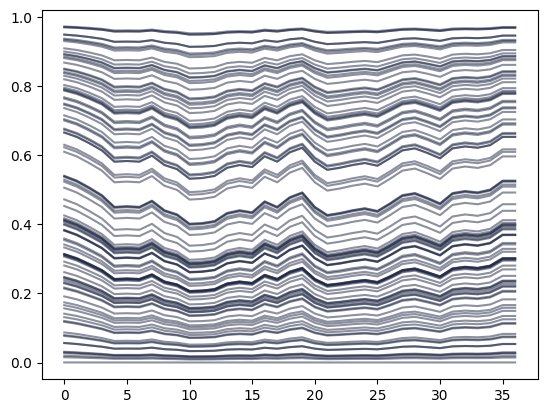

In [ ]:
print(f'This is the history of credences for each agent, with agent type {agent_type}')
for agent_hist in my_model.agent_histories:
    plt.plot(agent_hist,c="#1a2340",alpha=.5)

## Beta

  0%|          | 2/10000 [00:00<04:21, 38.22it/s]

steps:  3
This is the history of mean credences of the agents, with agent type beta


<Axes: title={'center': 'Mean Credences'}>

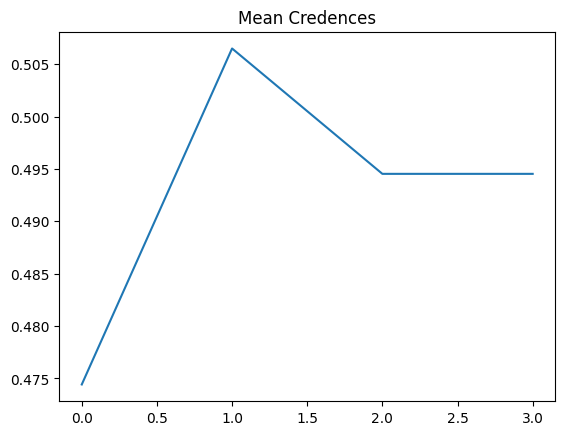

In [ ]:
n_agents = 100
agent_type = "beta"
my_network = nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)
my_model = Model(my_network, n_experiments=10, uncertainty=0.001,agent_type = agent_type)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount
print('steps: ',my_model.n_steps)
df = pd.DataFrame(my_model.agent_histories)
mean_credences = df.mean()
print(f'This is the history of mean credences of the agents, with agent type {agent_type}')
mean_credences.plot(title='Mean Credences')

This is the history of credences for each agent, with agent type beta


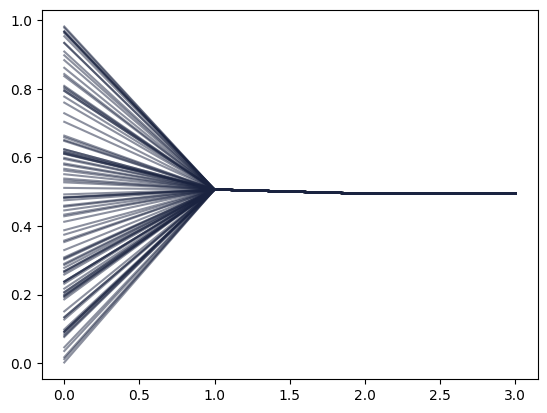

In [ ]:
print(f'This is the history of credences for each agent, with agent type {agent_type}')
for agent_hist in my_model.agent_histories:
    plt.plot(agent_hist,c="#1a2340",alpha=.5)

# 3. Simulations with simple networks

(Here we replicate the wheel, cycle, complete setup)

## First we define the simulation function and run it

In [ ]:
def create_graph(keyword, n_agents):
    if keyword == "complete":
        return nx.complete_graph(n_agents)
    elif keyword == "wheel":
        return nx.wheel_graph(n_agents)
    elif keyword == "cycle":
        return nx.cycle_graph(n_agents)
    else:
        raise ValueError("Invalid keyword. Please choose 'complete', 'wheel', or 'cycle'.")

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 20)
        network_keyword = random.choice(["complete", "wheel", "cycle"])
        network = create_graph(network_keyword, n_agents)
        uncertainty = 0.01
        n_experiments = random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "network_type" : network_keyword,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
# parameter_dictionaries = generate_parameters(50)


In [ ]:
import numbers
def run_simulation_with_params(param_dict, number_of_steps=1000, show_bar=False,agent_type="beta"):
    # Extract the network directly since it's already a NetworkX graph object
    my_network = param_dict['network']
    # Other parameters are directly extracted from the dictionary
    my_model = Model(my_network, n_experiments=param_dict['n_experiments'], uncertainty=param_dict['uncertainty']
                    , agent_type=agent_type)
    # Run the simulation with predefined steps and show_bar option
    
    my_model.run_simulation(number_of_steps=number_of_steps, show_bar=show_bar)
  
    

    result_dict = {
        key: value 
        for key, value in param_dict.items() 
        if isinstance(value, (numbers.Number, str, tuple, list))}   
    result_dict['true_consensus'] = my_model.conclusion
    result_dict['true_consensus_alternative_stop'] = my_model.conclusion_alternative_stop
    #df = pd.DataFrame(my_model.agents_choices) 
    #result_dict['choice_consensus'] = df.mean()[len(df.mean())-1]
    result_dict['convergence_step'] = my_model.n_steps # takes note of the last reported step
    result_dict['agent_type']=agent_type
    
    return result_dict


parameter_dictionaries = generate_parameters(1000)  # Generate one for demonstration
result = run_simulation_with_params(parameter_dictionaries[1], number_of_steps=200, show_bar=False)
#print(result['choice_consensus'])
print(result['convergence_step'])


200


In [ ]:
# Ensure your run_simulation_with_params function and others are defined

def run_simulations(param_list, number_of_steps=200, show_bar=False,agent_type="beta"):
    def run_simulation(param_dict):
        return run_simulation_with_params(param_dict, number_of_steps=number_of_steps, show_bar=show_bar,agent_type=agent_type)
    
    results = []
    # Iterate over each parameter dictionary in the list
    for params in tqdm.tqdm(param_list, desc="Running simulations"):
        result = run_simulation(params)
        results.append(result)
    
    # Convert the list of results into a Pandas DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
parameter_dictionaries = generate_parameters(100)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=200, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 100/100 [00:22<00:00,  4.35it/s]

    n_agents network_type  uncertainty  n_experiments  true_consensus  \
0         10     complete         0.01            526             1.0   
1         14        cycle         0.01            359             1.0   
2         13        wheel         0.01            157             1.0   
3          3        cycle         0.01            280             1.0   
4         12     complete         0.01            270             1.0   
..       ...          ...          ...            ...             ...   
95        18     complete         0.01            615             1.0   
96        11        wheel         0.01            873             0.0   
97         8        cycle         0.01            822             1.0   
98        12        cycle         0.01            739             1.0   
99         4        wheel         0.01            689             1.0   

   true_consensus_alternative_stop  convergence_step agent_type  
0                              1.0                21     

In [ ]:
# The difference between true consensus and choice consensus is that it happens to be the case that for the parameters explored
# if there is no true consensus at the end, then i think they should have different values
# maybe Im wrong
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   n_agents                         100 non-null    int64  
 1   network_type                     100 non-null    object 
 2   uncertainty                      100 non-null    float64
 3   n_experiments                    100 non-null    int64  
 4   true_consensus                   100 non-null    float64
 5   true_consensus_alternative_stop  100 non-null    object 
 6   convergence_step                 100 non-null    int64  
 7   agent_type                       100 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


## Now Some Standard Plotting

In [ ]:
def plot_big_results(results_df=results_df,variable_of_interest = 'true_consensus'):
    grouped = results_df.groupby(['network_type', 'n_agents'])[variable_of_interest].mean().reset_index()

    # Preparing for the line plot
    #grouped['mid_bin'] = grouped['binned'].apply(lambda x: x.mid).astype(float)  # Getting the midpoint of bins for plotting

    # Plotting
    plt.figure(figsize=(12, 8))

    for network_type in results_df['network_type'].unique():
        subset = grouped[grouped['network_type'] == network_type]
        plt.plot(subset['n_agents'], subset[variable_of_interest], marker='o', label=network_type)

    plt.xlabel('Number of Agents')
    plt.ylabel('Share of '+variable_of_interest)
    plt.title('Share of '+ variable_of_interest +' by Number of Agents and Network Type')
    plt.title(network_type)

    plt.grid(True)
    plt.show()

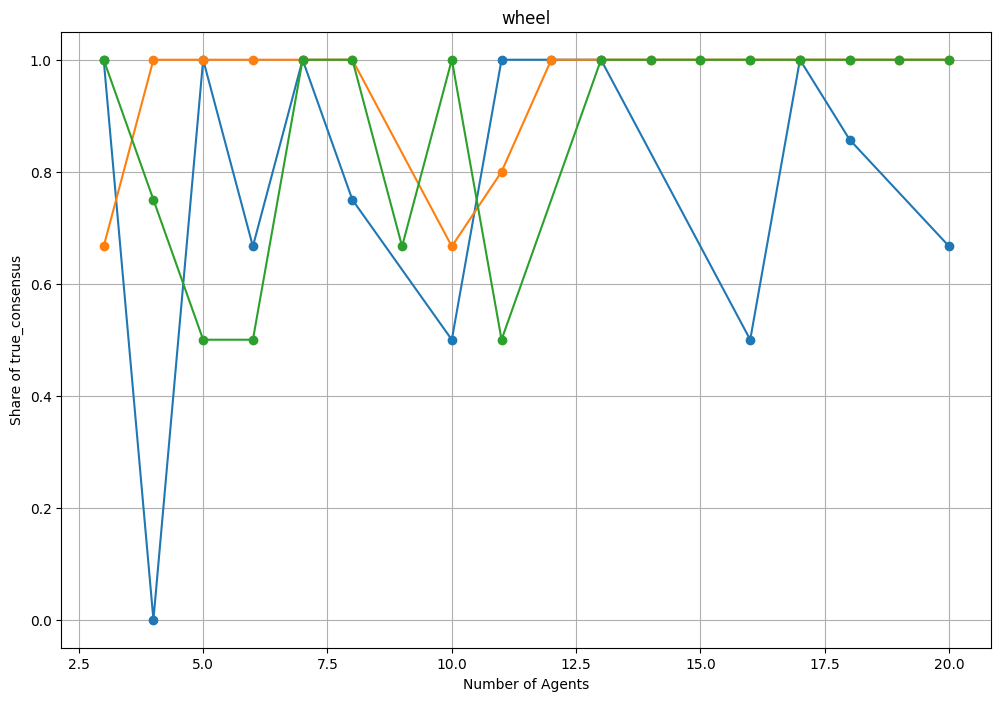

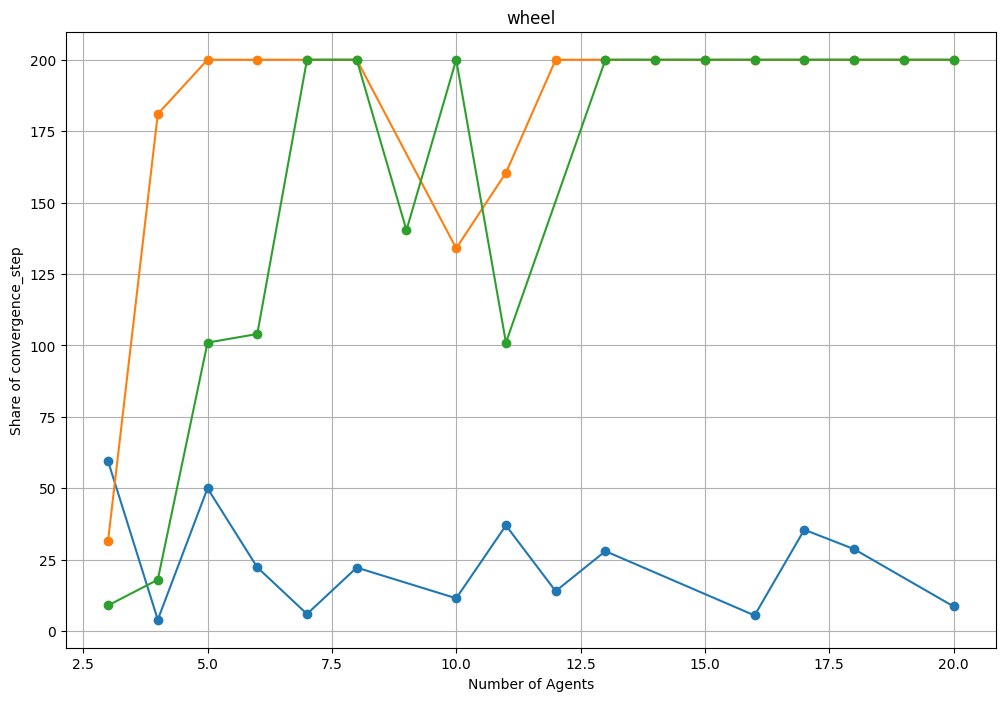

In [ ]:
plot_big_results(variable_of_interest = 'true_consensus')
#plot_big_results(variable_of_interest = 'choice_consensus')
plot_big_results(variable_of_interest = 'convergence_step')